This notebook outlines the data quality assessment steps.
Using test dataset /data3/adams/apertif/UGC8261, with configuration file /home/adams/apertif/DATA/cfg/UGC8261.cfg (http://happili-01.astron.nl:8002/edit/apertif/DATA/cfg/UGC8261.cfg). Or does someone else have a better example dataset?


Overall question for data assessment - how do we record? Google form for shakedown maybe, but should some of this go in the Apertif Task Database and/or ALTA?

In [4]:
#Setup apercal environment
import os;
myusername = os.environ['USER']
if not ('PYTHONPATH' in os.environ and
        '/home/' + myusername + '/apercal' in os.environ['PYTHONPATH']):
      print("WARNING: your apercal directory should be in the $PYTHONPATH")
        

In [5]:
#set up logging
%config IPCompleter.greedy=True
%matplotlib notebook
import libs.lib as lib
lib.setup_logger('info', logfile='/home/{}/apertif/DATA/logs/DQA.log'.format(myusername))

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/apertif/DATA/logs/DQA.log


Setup logger with lib.setup_logger()


In [6]:
import apercal

In [7]:
#Read the parameter file used for the Apercal run
cfgfile ='/home/adams/apertif/DATA/cfg/UGC8261.cfg'

In [25]:
#import things needed for interacting with data
import libs.lib as lib
import subs.readmirlog
import numpy as np
from matplotlib import pyplot as plt
import subs
import sys

sys.path.append('/home/adams/python')
import mirplot #developed by Brad, at https://github.com/foxmouldy/apercal/blob/master/mirplot.py


In [1]:
#Run the prepare module

"""Use RFInder to estimate the amount of RFI present in dataset"""
#do that here!

'Use RFInder to estimate the amount of RFI present in dataset'

In [2]:
#Run the flagging module - preflag, bandpass, aoflagger

"""Use RFInder with rfi_par.cfg_par['rfi']['RFInder_mode'] = 'use_flags'
to see the actual flagging.
Compare to predicted flagging (above)
Keep predicted noise as a record to compare to output from imstat after making line cube
Also generate a record of percentage of data flagged
"""
#do that here!

"Use RFInder with rfi_par.cfg_par['rfi']['RFInder_mode'] = 'use_flags'\nto see the actual flagging.\nCompare to predicted flagging (above)\nKeep predicted noise as a record to compare to output from imstat after making line cube\n"

In [34]:
#Run the convert module, may need to recompute uvcoordinates (w/ uvedit?)
"""Make plots of:
amplitude vs. time (uvplt)  (average over frequency?)
ampltidue vs. uvdist (uvplt) (average over frequency?)
amplitude vs. frequency (uvspec) (average over time?)
Look at inspection plots for comparison/extra information
"""

#load apercal module, will be in that environment
#But remember that things are complicated because apercal does directory changes
#So always be explicit about where you are working
convert = apercal.convert(cfgfile)

#make sure in working directory
subs.managefiles.director(convert,'ch',convert.crosscaldir)

print os.getcwd()

vis = convert.target
mir = convert.target[:-3] +'.mir'


v=convert.crosscaldir+'/'+mir
print v

#Do amplitude vs. time

#mirplot.uvplt(vis=v, r=5., tempdir="/home/adams/mirtemp", stokes="xx", nxy="4,4")
uvplt = lib.miriad('uvplt')
uvplt.vis = mir
uvplt.axis ='time,amplitude'
uvplt.line = 'chan,11008,1' #average all chans together, should be 16384 but this is old data
uvplt.device='amptime.gif/gif'
uvplt.nxy='4,4'
#uvplt.log = '/home/adams/shakedown/amp_time_output.txt'
uvplt.go()

#os.system('convert amptime.ps amptime.png')


CONVERT - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/UGC8261.cfg successfully read! ###


/data3/adams/apertif/UGC8261/00/crosscal
/data3/adams/apertif/UGC8261/00/crosscal/UGC8261.mir


['',
 'uvplt: Revision 1.18, 2014/05/21 04:34:59 UTC',
 '',
 'Will plot unflagged data',
 '',
 'Applying bandpass corrections to UGC8261.mir',
 'Applying gain corrections to UGC8261.mir',
 '',
 '',
 'File # 1  = UGC8261.mir',
 'UGC8261.mir 1.3066 GHz',
 'Read 279536 visibilities from all files',
 '',
 'Baseline 1-2, plot 5392 points',
 'Baseline 1-3, plot 5384 points',
 'Baseline 1-4, plot 5364 points',
 'Baseline 1-5, plot 5380 points',
 'Baseline 1-6, plot 5380 points',
 'Baseline 1-9, plot 4664 points',
 'Baseline 1-10, plot 5368 points',
 'Baseline 1-11, plot 5384 points',
 'Baseline 2-3, plot 5352 points',
 'Baseline 2-4, plot 5376 points',
 'Baseline 2-5, plot 5364 points',
 'Baseline 2-6, plot 5332 points',
 'Baseline 2-7, plot 5292 points',
 'Baseline 2-9, plot 4676 points',
 'Baseline 2-10, plot 5372 points',
 'Baseline 2-11, plot 5384 points',
 'Baseline 3-4, plot 5384 points',
 'Baseline 3-6, plot 5368 points',
 'Baseline 3-7, plot 5380 points',
 'Baseline 3-9, plot 4660 poi

![AmpTime](/data3/adams/apertif/UGC8261/00/crosscal/amptime.png)

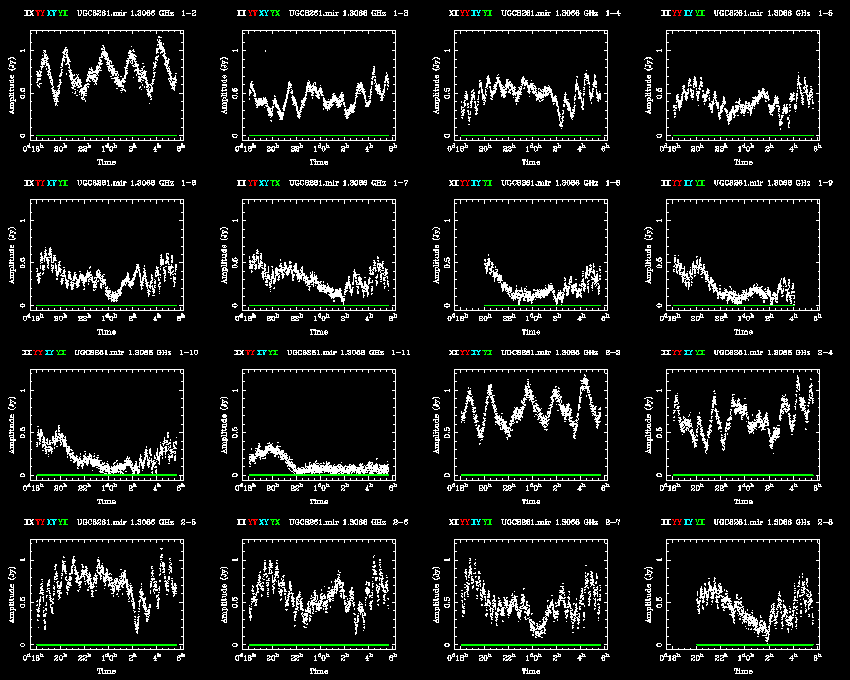

In [35]:
#Copied *gif to png since they're actually saved as single frames
#So now I need to add a bunch of file handling code
from IPython.display import Image
Image(filename='/data3/adams/apertif/UGC8261/00/crosscal/amptime.png') 

In [36]:
from IPython.display import Image
Image(filename='/data3/adams/apertif/UGC8261/00/crosscal/amptime.gif') 

ValueError: Cannot embed the 'gif' image format

In [ ]:
![SegmentLocal](/Users/username/some-folder/191px-Seven_segment_display-animated.gif "segment")#Run the cross-calibration module

"""
Plot bandpass solution (amplitude & phase)
Print gain amplitude solutions
"""

In [ ]:
#Run the self-calibration module

"""
Plot gains as function of time per antenna
Display images of final image and mask for each chunk 
    (or save to file?, need for all beams, disply just for central beam?)
"""

In [ ]:
#Run the continuum imaging module
"""
Calculate noise and compare to expected noise (print and record)
DR estimate (how to automate?)
Display final image (center beam, save to file for other beams?)
"""

In [ ]:
#Run the line imaging module
"""
Noise vs. expected as function of frequency
    -Also compare to predictions from RFInder
Produce spectrum within a box at a given offset from center
"""

In [ ]:
#Run the transfer module